<a href="https://colab.research.google.com/github/remyaP12/labcycle/blob/main/8_3labcycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement any two segmentation algorithms and compare the efficiency with ground truth.

Threshold Segmentation
Accuracy: 0.625567634170335
Dice: 0.10063666143574015
IoU: 0.05298441819552652

K-Means Segmentation
Accuracy: 0.625567634170335
Dice: 0.10063666143574015
IoU: 0.05298441819552652


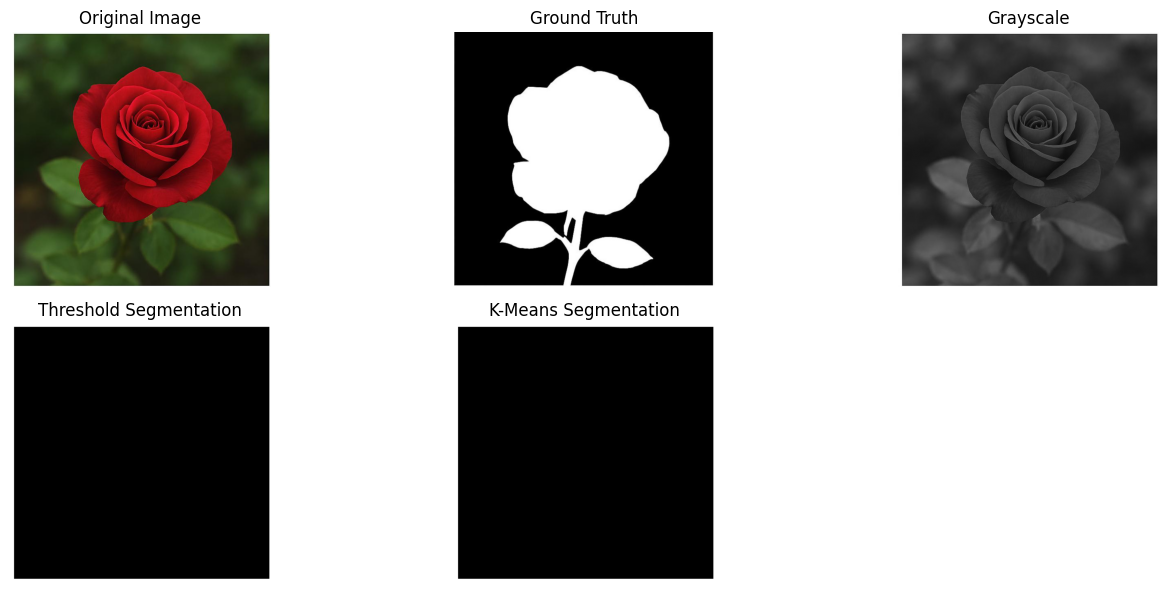

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


image = cv2.imread("/content/rose_Orginal.png")
gt = cv2.imread("/content/RoseGroundB.png", cv2.IMREAD_GRAYSCALE)

if image is None or gt is None:
    print("Error: Image or Ground Truth not found")
    exit()

# Resize ground truth if size mismatch
gt = cv2.resize(gt, (image.shape[1], image.shape[0]))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


#  Thresholding

_, seg_thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# K-Means Clustering

pixels = gray.reshape((-1, 1))
pixels = np.float32(pixels)

kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(pixels)

seg_kmeans = labels.reshape(gray.shape)
seg_kmeans = np.uint8(seg_kmeans * 255)


def segmentation_metrics(seg, gt):
    seg = seg.flatten() > 0
    gt = gt.flatten() > 0

    tp = np.sum(seg & gt)
    fp = np.sum(seg & ~gt)
    fn = np.sum(~seg & gt)
    tn = np.sum(~seg & ~gt)

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    dice = (2 * tp) / (2 * tp + fp + fn)
    iou = tp / (tp + fp + fn)

    return accuracy, dice, iou

# Compute metrics
acc_t, dice_t, iou_t = segmentation_metrics(seg_thresh, gt)
acc_k, dice_k, iou_k = segmentation_metrics(seg_kmeans, gt)


print("Threshold Segmentation")
print("Accuracy:", acc_t)
print("Dice:", dice_t)
print("IoU:", iou_t)

print("\nK-Means Segmentation")
print("Accuracy:", acc_k)
print("Dice:", dice_k)
print("IoU:", iou_k)


plt.figure(figsize=(14,6))

plt.subplot(2,3,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2,3,2)
plt.title("Ground Truth")
plt.imshow(gt, cmap='gray')
plt.axis("off")

plt.subplot(2,3,3)
plt.title("Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(2,3,4)
plt.title("Threshold Segmentation")
plt.imshow(seg_thresh, cmap='gray')
plt.axis("off")

plt.subplot(2,3,5)
plt.title("K-Means Segmentation")
plt.imshow(seg_kmeans, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()
